In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Flatten, Conv2D

ModuleNotFoundError: No module named 'keras'

# Evrişimsel Sinir Ağları (CNN) ile Veriyi Hazırlama

CNN, bir girdi görüntüsünü alıp, görüntüdeki çeşitli görünüşleri/nesneleri birbirinden ayırabilen derin öğrenme algoritmasıdır. Temel olarak görüntüleri sınıflandırmak (örneğin gördüklerini isimlendirmek), benzerlikle kümelemek (fotoğraf arama) ve sahnelerde nesne tanıma yapmak için kullanılan derin yapay sinir ağlarıdır.

In [10]:
Train_no = 1
engine_id = 50

df = pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
df = df[df['ID'] == engine_id]
df = df.drop(columns = ['ID'])

df

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
9711,1,642.12,1582.50,1400.44,553.76,2388.05,47.31,521.97,2388.08,8.4366,394,38.96,23.3947,197
9712,2,642.62,1589.90,1404.14,554.52,2388.02,47.31,522.27,2388.02,8.4211,394,38.91,23.4594,196
9713,3,642.55,1582.75,1403.42,554.26,2388.04,47.41,522.40,2388.04,8.3931,392,38.97,23.3230,195
9714,4,642.61,1586.91,1403.46,554.56,2388.05,47.46,522.25,2388.08,8.4286,393,38.91,23.3886,194
9715,5,642.41,1589.70,1401.43,554.26,2388.05,47.33,522.10,2388.00,8.4295,394,38.98,23.3340,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,194,643.77,1604.93,1423.51,551.41,2388.18,48.16,519.85,2388.19,8.5043,396,38.42,23.0543,4
9905,195,643.33,1605.31,1434.87,551.25,2388.17,48.14,519.33,2388.21,8.5352,395,38.45,23.0191,3
9906,196,643.32,1602.26,1430.01,551.40,2388.19,48.24,519.88,2388.17,8.5034,395,38.45,23.0379,2
9907,197,643.73,1599.94,1432.87,551.18,2388.19,48.22,519.48,2388.20,8.5241,397,38.52,23.0832,1


In [12]:
########## Scalling the Data
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
print('Shape of df for engine {}:'.format(engine_id),df.shape)
df

Shape of df for engine 50: (198, 14)


array([[0.        , 0.14222222, 0.19258561, ..., 0.78571429, 0.82617801,
        1.        ],
       [0.00507614, 0.36444444, 0.42507069, ..., 0.72619048, 0.96167539,
        0.99492386],
       [0.01015228, 0.33333333, 0.20043984, ..., 0.79761905, 0.67602094,
        0.98984772],
       ...,
       [0.98984772, 0.67555556, 0.8133836 , ..., 0.17857143, 0.07895288,
        0.01015228],
       [0.99492386, 0.85777778, 0.74049639, ..., 0.26190476, 0.17382199,
        0.00507614],
       [1.        , 0.90222222, 1.        , ..., 0.1547619 , 0.22701571,
        0.        ]])

In [13]:
########### Getting into training shape with slidingwindows
features = df[:,0:-1]
target = df[:,-1]
target

array([1.        , 0.99492386, 0.98984772, 0.98477157, 0.97969543,
       0.97461929, 0.96954315, 0.96446701, 0.95939086, 0.95431472,
       0.94923858, 0.94416244, 0.93908629, 0.93401015, 0.92893401,
       0.92385787, 0.91878173, 0.91370558, 0.90862944, 0.9035533 ,
       0.89847716, 0.89340102, 0.88832487, 0.88324873, 0.87817259,
       0.87309645, 0.8680203 , 0.86294416, 0.85786802, 0.85279188,
       0.84771574, 0.84263959, 0.83756345, 0.83248731, 0.82741117,
       0.82233503, 0.81725888, 0.81218274, 0.8071066 , 0.80203046,
       0.79695431, 0.79187817, 0.78680203, 0.78172589, 0.77664975,
       0.7715736 , 0.76649746, 0.76142132, 0.75634518, 0.75126904,
       0.74619289, 0.74111675, 0.73604061, 0.73096447, 0.72588832,
       0.72081218, 0.71573604, 0.7106599 , 0.70558376, 0.70050761,
       0.69543147, 0.69035533, 0.68527919, 0.68020305, 0.6751269 ,
       0.67005076, 0.66497462, 0.65989848, 0.65482234, 0.64974619,
       0.64467005, 0.63959391, 0.63451777, 0.62944162, 0.62436

In [17]:
win_length = 25 #### Sliding Window Length (Aşağıya doğru 25 satır)
feature_num = 13 #### Total number of features (Yana doğru 13 sütun)

ts_generator = TimeseriesGenerator(features, target, length = win_length, sampling_rate = 1, batch_size = 1)

NameError: name 'TimeseriesGenerator' is not defined

In [ ]:
ts_generator[0]

In [16]:
print('Girdi özelliğinin şekli', np.shape(ts_generator[0][0]))
print((ts_generator[0][0]))
print('\n')
print('Çıktı değerinin şekli', np.shape(ts_generator[0][1]))
print((ts_generator[0][1]))

NameError: name 'ts_generator' is not defined

In [23]:
X = []
y = []

x_temp, y_temp = ts_generator[0]
X.append(x_temp.reshape(x_temp.shape[1], x_temp.shape[2],1))
y.append(y_temp)

print(X)
print(y)

NameError: name 'ts_generator' is not defined

**Buraya kadar yaptığımız kısımları fonksiyon haline getiriyoruz ve bu şekilde daha düzenli ve kolay ulaşabiliyor oluyor.**

In [24]:

def Data_format_conversion(Train_no, engine_id):
    
    import pandas as pd
    import numpy as np
    df = pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']] == engine_id]
    df = df.drop(columns = ['ID'])
    
    ################ Scalling the Data
    scaler = MinMaxScaler()
    df = scaler.fit_transform(df)
    print('Shape of df for engine {}: '.format(engine_id),df.shape)
    
    ################ Getting into training shape with slidingwindow
    features = df[:,0:-1]
    target = df[:,-1]
    
    ts_generator = TimeseriesGenerator(features, target, length = win_length, sampling_rate = 1, batch_size = 1)
    
    ################
    X = []
    y = []
    for i in range(len(ts_generator)):
        x_temp, y_temp = ts_generator[i]
        x.append(x_temp.reshape(x_temp.shape[1], x_temp.shape[2],1))
        y.append(y_temp)
        
    X=np.array(X)
    y = np.array(y)
    
    return(X,y,scaler,features)

SyntaxError: unmatched ']' (1351765988.py, line 6)

# CNN Modelini Eğitme

In [ ]:
win_length = 25 #### Sliding Window Length
feature_num = 13 #### Total number of features

model = Sequential()
#CNN
model.add(Conv2D(filters=64, kernel_size=3, activation='relu',input_shape=(win_length,feature_num,1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
#model.summary()

In [25]:
########## Fitting the training data with CNN
Train_no = 1
for engine_no in range(1,50):
    X,y,scaler,features = Data_format_conversion(Train_no, engine_no)
    model.fit(X,y,steps_per_epoch=5,epochs=15,shuffle=False,verbose=0)

NameError: name 'Data_format_conversion' is not defined

# Kaydedilen Modeli yükleme

In [26]:
from keras.models import load_model

#load model
model = load_model('model_1.h5')

ModuleNotFoundError: No module named 'keras'

# Eğitim Veri Setinde Tahmin Etme (Predict on Training Data) 

In [28]:
Train_no = 1
engine_id = 1
X,y,scaler,features=Data_format_conversion(Train_no,engine_id)

NameError: name 'Data_format_conversion' is not defined

In [27]:
X.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
predition=model.predict(X) #### Prediction on trained data
prediction

In [ ]:
len(features)

In [ ]:
rev_trans = pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)], axis=1)
rev_trans

In [30]:
df = pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
df = df[df['ID']==engine_id]
df_actual = df.drop(columns =['ID'])
df_actual

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,643.75,1602.38,1422.78,551.94,2388.31,48.00,519.79,2388.23,8.5207,396,38.51,22.9588,4
188,189,644.18,1596.17,1428.01,550.70,2388.27,48.08,519.58,2388.33,8.5183,395,38.48,23.1127,3
189,190,643.64,1599.22,1425.95,551.29,2388.29,48.33,520.04,2388.35,8.5223,398,38.49,23.0675,2
190,191,643.34,1602.36,1425.77,550.92,2388.28,48.15,519.57,2388.30,8.5174,394,38.45,23.1295,1


In [31]:
print('Bu Veri Seti için RMSE Değeri:', np.sqrt(metrics.mean_squared_error(df[actual['RUL'][win_length:],rev_trans[13]])))

NameError: name 'metrics' is not defined

NameError: name 'rev_trans' is not defined

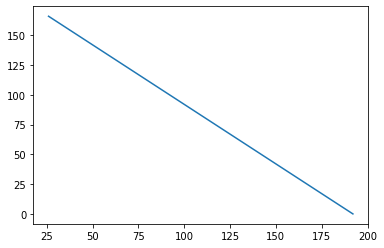

In [32]:
plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
plt.plot(rev_trans[0], rev_trans[13])
plt.ylabel('RUL')
plt.xlabel('Cycle')
plt.title('Motor Numarası: {}'.format(engine_id))
plt.legend(['Actual','Prediction'], loc = 'upper right')
plt.show()
print('\n')